# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

633

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
number = 0
sets = 1

# variables to collect
city_data = {"City": [],
       "Cloudiness": [],
       "Country": [],
       "Date": [],
       "Humidity": [],
       "Lat": [],
       "Lng": [],
       "Max Temp": [],
       "Wind Speed": []}


# set up initial message
print(f"Beginning Data Retrieval")
print("-------------------------")

# Build query URL
for city in cities:
    query_url = url + "appid=" + weather_api_key + "&q=" + city
    response = requests.get(query_url).json()
    number = number + 1
    if number == 51:
        sets = sets+1
        number = 1
    try:
        print(f"Processing Record {number} of Set {sets} | {city}")
        city_data["City"].append(response['name'])
        city_data["Cloudiness"].append(response['clouds']['all'])
        city_data["Country"].append(response['sys']['country'])
        city_data["Date"].append(response['dt'])
        city_data["Humidity"].append(response['main']['humidity'])
        city_data["Lat"].append(response['coord']['lat'])
        city_data["Lng"].append(response['coord']['lon'])
        city_data["Max Temp"].append(response['main']['temp_max'])
        city_data["Wind Speed"].append(response['wind']['speed'])
    except:
        print("City not found. Skipping ...")
    time.sleep(.2)

Beginning Data Retrieval
-------------------------
Processing Record 1 of Set 1 | taolanaro
City not found. Skipping ...
Processing Record 2 of Set 1 | hermanus
Processing Record 3 of Set 1 | ponta do sol
Processing Record 4 of Set 1 | mar del plata
Processing Record 5 of Set 1 | katsuura
Processing Record 6 of Set 1 | manono
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | machali
Processing Record 9 of Set 1 | lompoc
Processing Record 10 of Set 1 | khatanga
Processing Record 11 of Set 1 | illoqqortoormiut
City not found. Skipping ...
Processing Record 12 of Set 1 | hithadhoo
Processing Record 13 of Set 1 | avarua
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | gazli
Processing Record 16 of Set 1 | punta arenas
Processing Record 17 of Set 1 | tiksi
Processing Record 18 of Set 1 | yellowknife
Processing Record 19 of Set 1 | faanui
Processing Record 20 of Set 1 | hamura
Processing Record 21 of Set 1 | peniche
Processing Record 22 of Set 1 | ba

Processing Record 39 of Set 4 | gisborne
Processing Record 40 of Set 4 | ixtapa
Processing Record 41 of Set 4 | saint anthony
Processing Record 42 of Set 4 | sayyan
Processing Record 43 of Set 4 | hasaki
Processing Record 44 of Set 4 | san quintin
Processing Record 45 of Set 4 | balaci
Processing Record 46 of Set 4 | natal
Processing Record 47 of Set 4 | henties bay
Processing Record 48 of Set 4 | novo aripuana
Processing Record 49 of Set 4 | najran
Processing Record 50 of Set 4 | ust-kamchatsk
City not found. Skipping ...
Processing Record 1 of Set 5 | vaitupu
City not found. Skipping ...
Processing Record 2 of Set 5 | mys shmidta
City not found. Skipping ...
Processing Record 3 of Set 5 | talnakh
Processing Record 4 of Set 5 | trelew
Processing Record 5 of Set 5 | cayenne
Processing Record 6 of Set 5 | burica
City not found. Skipping ...
Processing Record 7 of Set 5 | borkenes
Processing Record 8 of Set 5 | kaitangata
Processing Record 9 of Set 5 | tevriz
Processing Record 10 of Set 

Processing Record 31 of Set 8 | high level
Processing Record 32 of Set 8 | kemijarvi
Processing Record 33 of Set 8 | barra patuca
Processing Record 34 of Set 8 | san andres
Processing Record 35 of Set 8 | helong
Processing Record 36 of Set 8 | high prairie
Processing Record 37 of Set 8 | makakilo city
Processing Record 38 of Set 8 | pontianak
Processing Record 39 of Set 8 | luganville
Processing Record 40 of Set 8 | kralendijk
Processing Record 41 of Set 8 | trinidad
Processing Record 42 of Set 8 | monte alegre
Processing Record 43 of Set 8 | constitucion
Processing Record 44 of Set 8 | barra do garcas
Processing Record 45 of Set 8 | nkhotakota
Processing Record 46 of Set 8 | arraial do cabo
Processing Record 47 of Set 8 | korcula
Processing Record 48 of Set 8 | japura
Processing Record 49 of Set 8 | iqaluit
Processing Record 50 of Set 8 | omboue
Processing Record 1 of Set 9 | havoysund
Processing Record 2 of Set 9 | nador
Processing Record 3 of Set 9 | doha
Processing Record 4 of Set 

Processing Record 14 of Set 12 | mehriz
Processing Record 15 of Set 12 | yarada
Processing Record 16 of Set 12 | narok
Processing Record 17 of Set 12 | puerto gaitan
Processing Record 18 of Set 12 | tiete
Processing Record 19 of Set 12 | tigre
Processing Record 20 of Set 12 | andapa
Processing Record 21 of Set 12 | grand centre
City not found. Skipping ...
Processing Record 22 of Set 12 | kanata
Processing Record 23 of Set 12 | joshimath
Processing Record 24 of Set 12 | belaya gora
Processing Record 25 of Set 12 | sao francisco
Processing Record 26 of Set 12 | raudeberg
Processing Record 27 of Set 12 | cubuk
Processing Record 28 of Set 12 | codrington
Processing Record 29 of Set 12 | yulara
Processing Record 30 of Set 12 | samalaeulu
City not found. Skipping ...
Processing Record 31 of Set 12 | prince rupert
Processing Record 32 of Set 12 | galdar
Processing Record 33 of Set 12 | yuksekova
Processing Record 34 of Set 12 | asyut
Processing Record 35 of Set 12 | pakxan
Processing Record 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
city_weather = pd.DataFrame(city_data)
city_weather.count()

City          583
Cloudiness    583
Country       583
Date          583
Humidity      583
Lat           583
Lng           583
Max Temp      583
Wind Speed    583
dtype: int64

In [5]:
# create dataframe
city_weather_df = pd.DataFrame({"City":city_data["City"],
                                "Country":city_data["Country"],
                                "Date":city_data["Date"],
                                "Lat":city_data["Lat"],
                                "Lng":city_data["Lng"],
                                "Max Temp":city_data["Max Temp"],
                                "Wind Speed":city_data["Wind Speed"],
                                "Cloudiness":city_data["Cloudiness"],
                                "Humidity":city_data["Humidity"]
                               })
city_weather_df

,City,Country,Date,Lat,Lng,Max Temp,Wind Speed,Cloudiness,Humidity
0,Hermanus,ZA,1592405778,-34.42,19.23,294.82,1.46,0,49
1,Ponta do Sol,PT,1592405790,32.67,-17.10,296.15,2.10,40,78
2,Mar del Plata,AR,1592405540,-38.00,-57.56,290.15,2.60,75,93
3,Katsuura,JP,1592405889,35.13,140.30,295.15,2.10,75,83
4,Manono,CD,1592406345,-7.30,27.42,303.39,2.97,0,24
...,...,...,...,...,...,...,...,...,...
578,Vega de Alatorre,MX,1592406508,20.03,-96.63,301.30,2.22,0,67
579,Dekar,BW,1592406508,-21.53,21.93,293.74,4.35,0,31
580,Verkhoyansk,RU,1592406508,67.54,133.38,291.81,2.95,48,49
581,Catalão,BR,1592406508,-18.17,-47.95,296.23,6.27,0,56


In [6]:
# print to csv file
#export dataframe to CSV file
city_weather_df.to_csv(output_data_file, encoding="utf-8", index=False, header=True)


# output_data_file = "output_data/cities.csv"
# with open(output_data_file, mode='w') as csv_file:
#     csv_file=city_weather_df.to_csv(index=False)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

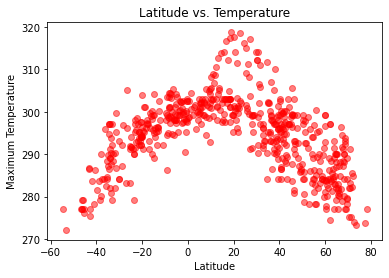

In [7]:
fig=plt.figure()
plt.scatter(city_weather_df["Lat"], city_weather_df["Max Temp"], marker="o", facecolor="red", alpha=0.5)
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature")
plt.title("Latitude vs. Temperature")
plt.savefig("output_data/WeatherPy/lat_v_temp.png")

#### Latitude vs. Humidity Plot

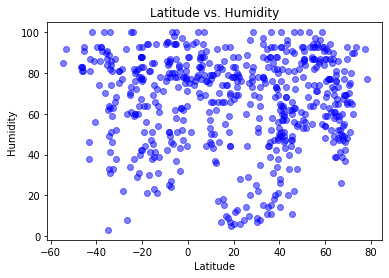

In [8]:
fig=plt.figure()
plt.scatter(city_weather_df["Lat"], city_weather_df["Humidity"], marker="o", facecolor="blue", alpha=0.5)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs. Humidity")
plt.savefig("output_data/WeatherPy/lat_v_humidity.png")

#### Latitude vs. Cloudiness Plot

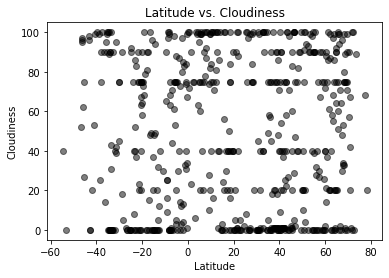

In [9]:
fig=plt.figure()
plt.scatter(city_weather_df["Lat"], city_weather_df["Cloudiness"], marker="o", facecolor="black", alpha=0.5)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs. Cloudiness")
plt.savefig("output_data/WeatherPy/lat_v_cloudiness.png")

#### Latitude vs. Wind Speed Plot

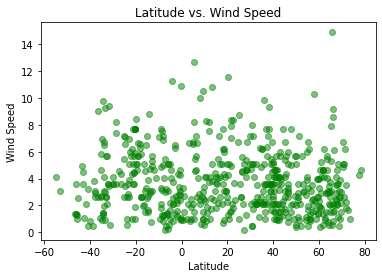

In [10]:
fig=plt.figure()
plt.scatter(city_weather_df["Lat"], city_weather_df["Wind Speed"], marker="o", facecolor="green", alpha=0.5)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs. Wind Speed")
plt.savefig("output_data/WeatherPy/lat_v_wind.png")

## Linear Regression

In [11]:
# OPTIONAL: Create a function to create Linear Regression plots
def LinReg(x,y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regression = x*slope+intercept
    line_eq = f"y={slope}x+{intercept}"
    plt.plot(x, regression, "black")
    plt.show
    return print(f"The value of r-squared is {rvalue**2}."), print(f"The line equation is: {line_eq}.")

In [12]:
# Create Northern and Southern Hemisphere DataFrames
north_hem = city_weather_df.loc[city_weather_df['Lat']>=0]
south_hem = city_weather_df.loc[city_weather_df['Lat']<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The value of r-squared is 0.5415274947337005.
The line equation is: y=-0.33862826424478043x+308.1063281467889.


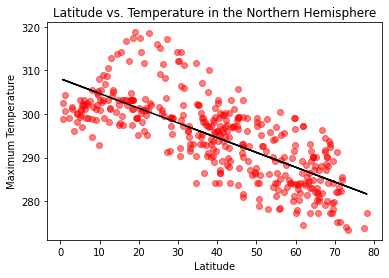

In [13]:
fig=plt.figure()
plt.scatter(north_hem["Lat"], north_hem["Max Temp"], marker="o", facecolor="red", alpha=0.5)
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature")
plt.title("Latitude vs. Temperature in the Northern Hemisphere")
LinReg(north_hem["Lat"], north_hem["Max Temp"])
plt.savefig("output_data/WeatherPy/northhem_lat_v_temp_linreg.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The value of r-squared is 0.6374382770012215.
The line equation is: y=0.43778243498584996x+302.54130639818743.


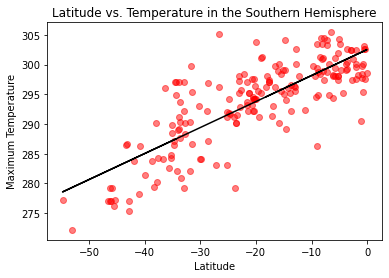

In [14]:
fig=plt.figure()
plt.scatter(south_hem["Lat"], south_hem["Max Temp"], marker="o", facecolor="red", alpha=0.5)
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature")
plt.title("Latitude vs. Temperature in the Southern Hemisphere")
LinReg(south_hem["Lat"], south_hem["Max Temp"])
plt.savefig("output_data/WeatherPy/southhem_lat_v_temp_linreg.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The value of r-squared is 0.0035593422637817556.
The line equation is: y=0.06820569768677767x+62.472156042741624.


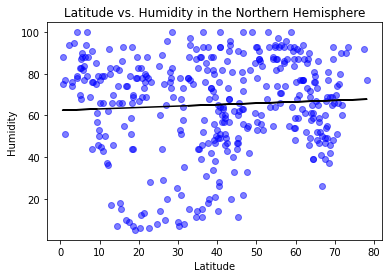

In [15]:
fig=plt.figure()
plt.scatter(north_hem["Lat"], north_hem["Humidity"], marker="o", facecolor="blue", alpha=0.5)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs. Humidity in the Northern Hemisphere")
LinReg(north_hem["Lat"], north_hem["Humidity"])
plt.savefig("output_data/WeatherPy/northhem_lat_v_humidity_linreg.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The value of r-squared is 0.006101422712700996.
The line equation is: y=-0.1273748665847198x+66.060855381808.


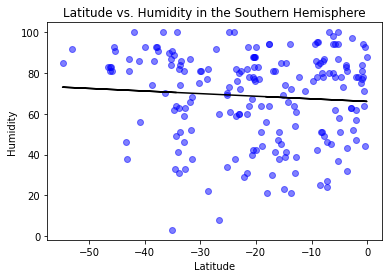

In [16]:
fig=plt.figure()
plt.scatter(south_hem["Lat"], south_hem["Humidity"], marker="o", facecolor="blue", alpha=0.5)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs. Humidity in the Southern Hemisphere")
LinReg(south_hem["Lat"], south_hem["Humidity"])
plt.savefig("output_data/WeatherPy/southhem_lat_v_humidity_linreg.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The value of r-squared is 0.0038351897614033307.
The line equation is: y=-0.11812656556008964x+53.70180373330634.


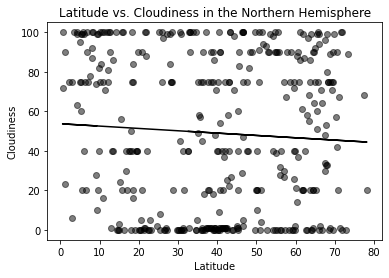

In [17]:
fig=plt.figure()
plt.scatter(north_hem["Lat"], north_hem["Cloudiness"], marker="o", facecolor="black", alpha=0.5)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs. Cloudiness in the Northern Hemisphere")
LinReg(north_hem["Lat"], north_hem["Cloudiness"])
plt.savefig("output_data/WeatherPy/northhem_lat_v_cloudiness_linreg.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The value of r-squared is 0.007754656155044619.
The line equation is: y=-0.250364776697526x+40.86278074916431.


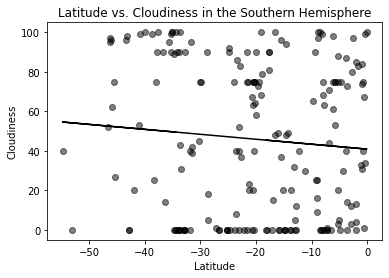

In [18]:
fig=plt.figure()
plt.scatter(south_hem["Lat"], south_hem["Cloudiness"], marker="o", facecolor="black", alpha=0.5)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs. Cloudiness in the Southern Hemisphere")
LinReg(south_hem["Lat"], south_hem["Cloudiness"])
plt.savefig("output_data/WeatherPy/southhem_lat_v_cloudiness_linreg.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The value of r-squared is 0.015584934820625245.
The line equation is: y=-0.014089931932630705x+4.143453330858632.


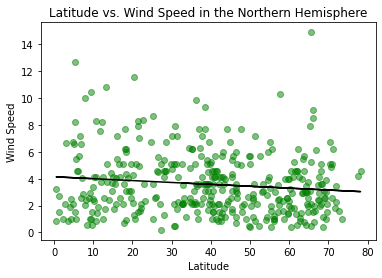

In [19]:
fig=plt.figure()
plt.scatter(north_hem["Lat"], north_hem["Wind Speed"], marker="o", facecolor="green", alpha=0.5)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs. Wind Speed in the Northern Hemisphere")
LinReg(north_hem["Lat"], north_hem["Wind Speed"])
plt.savefig("output_data/WeatherPy/northhem_lat_v_wind_linreg.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The value of r-squared is 1.1308843586440005e-06.
The line equation is: y=-0.00018661038546643078x+3.8048770642920244.


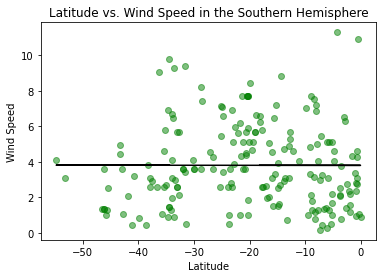

In [20]:
fig=plt.figure()
plt.scatter(south_hem["Lat"], south_hem["Wind Speed"], marker="o", facecolor="green", alpha=0.5)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs. Wind Speed in the Southern Hemisphere")
LinReg(south_hem["Lat"], south_hem["Wind Speed"])
plt.savefig("output_data/WeatherPy/southhem_lat_v_wind_linreg.png")